In [3]:
import pandas as pd
import json
import seaborn as sns
import matplotlib as plt
import requests
from scipy import misc
from IPython.display import display, Image
import random
import numpy as np
import cv2
import os
os.chdir('/home/app/src/') 

## Load Json

In [5]:


#Loadign dataset
with open('/home/app/src/data/products.json', encoding='utf-8') as f:
    prod = json.load(f)
    
df = pd.DataFrame(prod)
df = df.drop(['price', 'upc', 'shipping', 'model'], axis=1)



In [6]:
#Adding a column named ending to see if image is a png or a gift

ending= []

for row in df['image']:
    ending.append(row.split('.')[-1])

df['ending'] = ending

# Adding the end to the column
ends = []
for row in df['image']:

    for row in df['ending']:
    
        if row == 'gif':
            continue    
    ends.append(row)

In [7]:
#Checking if and image doensnt have url
df.url.isna().sum() 

0

In [8]:
#Numbers of gifs and png

df['ending'].value_counts()

jpg    51625
gif       21
Name: ending, dtype: int64

## Load images from the urls

In [ ]:
#Loading all of the images from the urls named them from row 1 to n

n=0

for row in df['image']:
    n +=1
    end = row.split('.')[-1]
    nombre_local_imagen = "row" + str(n) +'.'+ str(end)
    imagen = requests.get(row).content
    with open("/home/app/src/data_img/" + nombre_local_imagen, 'wb') as handler:
	    handler.write(imagen)

## Gifts

In [ ]:
#checking the gifts

for index ,row in df.iterrows():
    if 'gif' in df['ending'][index] :
        print(index)
        display(Image(filename='/home/app/src/data_img/row'+str(index+1)+'.gif'))
        
        

## Images

Image number: 50785

Name: Where the Wild Things Are - PRE-OWNED - Nintendo Wii

Decription: Let the wild rumpus start in an all-new way


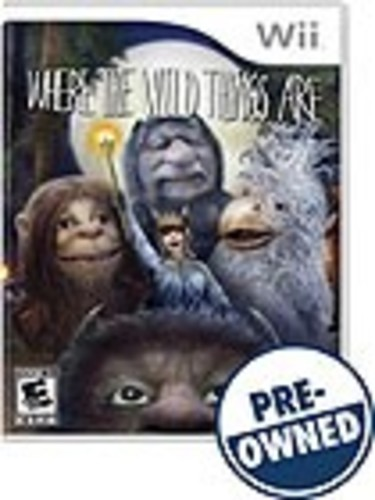

Image type: <class 'numpy.ndarray'>
Image shape: (500, 375, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255  

Image number: 15336

Name: RocknRoller - Multi-Cart Equipment Cart - Black

Decription: ROCKNROLLER Multi-Cart Equipment Cart: Accommodates instruments and music equipment; 8 different shapes; folding design; powdercoat steel-tube frame; R-Trac wheels


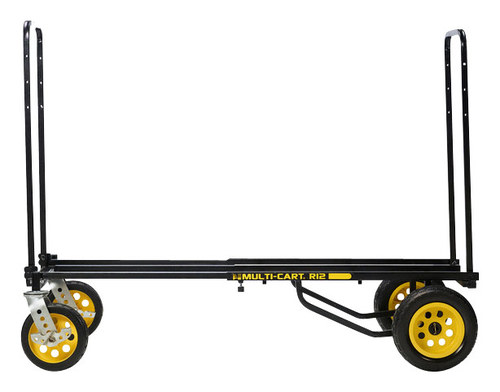

Image type: <class 'numpy.ndarray'>
Image shape: (392, 500, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255  

Image number: 8251

Name: Octane Seating - Magnolia 4-Seat Straight Leather Home Theater Seating - Black

Decription: From our expanded online assortment; row of 4 seats in a straight configuration; top-grain leather; wallaway design; chaise-style footrest; tall seat back; lumbar support; removable metal cup holders


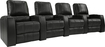

Image type: <class 'numpy.ndarray'>
Image shape: (47, 105, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255  

Image number: 33596

Name: SPT - Electric Roaster - Silver/Black

Decription: 30-minute timer with auto shutoff; steam-cook capability; top and bottom heating elements; built-in ceramic filter; removable, dishwasher-safe lid and base; cool-touch handles; window


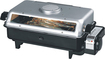

Image type: <class 'numpy.ndarray'>
Image shape: (59, 105, 3) (Height x Width x Channels)
Image min value: 10
Image max value: 255  



In [ ]:
for number in random.sample(range(51645), 4):
    print('Image number:', number )
    print('\nName:', df['name'][number-1])
    print("\nDecription:", df['description'][number-1])
    display(Image(filename='/home/app/src/data_img/row'+str(number)+'.jpg'))  
    img = cv2.imread('/home/app/src/data_img/row'+str(number)+'.jpg')
    print(f'Image type: {type(img)}')
    print(f'Image shape: {img.shape} (Height x Width x Channels)')
    print(f'Image min value: {img.min()}')
    print(f'Image max value: {img.max()}  \n')

In [ ]:
number = 27881
img = cv2.imread('/home/app/src/data_img/row'+str(number)+'.jpg')
print(type(img))

<class 'NoneType'>


## Broken URLS

In [52]:
#counting broken urls

counter= 0
broken_ones= []
largor=[]

#for index ,row in df.iterrows():
for number in range(1,len(df)):
    img = cv2.imread('/home/app/src/data_img/row'+str(number)+'.jpg')
    #print(f'Image type: {type(img)}')
    if img is None:
        counter +=1
        broken_ones.append(number)

print('total images with broken links', counter)

total images with broken links 1595


In [9]:
broken_ones

[38,
 94,
 224,
 228,
 469,
 470,
 612,
 613,
 798,
 949,
 971,
 982,
 996,
 1022,
 1075,
 1139,
 1253,
 1254,
 1256,
 1429,
 1488,
 1540,
 1559,
 1589,
 1672,
 1678,
 1729,
 1731,
 1733,
 1819,
 1844,
 1900,
 1980,
 1982,
 1983,
 1987,
 2089,
 2091,
 2202,
 2269,
 2525,
 2530,
 2602,
 2610,
 2744,
 2757,
 2759,
 2784,
 2789,
 3121,
 3389,
 3414,
 3415,
 3459,
 3471,
 3472,
 3473,
 3475,
 3476,
 3477,
 3524,
 3676,
 3881,
 3947,
 3957,
 4036,
 4051,
 4057,
 4063,
 4102,
 4194,
 4302,
 4364,
 4411,
 4414,
 4415,
 4469,
 4532,
 4534,
 4535,
 4561,
 4562,
 4567,
 4601,
 4734,
 4802,
 4806,
 4878,
 4884,
 4888,
 4889,
 4943,
 4947,
 4950,
 4969,
 4970,
 4989,
 5096,
 5133,
 5251,
 5284,
 5380,
 5383,
 5386,
 5469,
 5493,
 5494,
 5628,
 5629,
 5671,
 5673,
 5677,
 5714,
 5718,
 5728,
 5730,
 5734,
 5738,
 5739,
 5763,
 5809,
 6020,
 6065,
 6066,
 6072,
 6145,
 6190,
 6219,
 6221,
 6222,
 6224,
 6231,
 6233,
 6259,
 6348,
 6359,
 6362,
 6384,
 6385,
 6386,
 6387,
 6399,
 6419,
 6449,
 6457,


In [ ]:
percentage = 1616/51646*100
print(f'Total images with broken links: {round(percentage,2)}%')

Total images with broken links: 3.13%


## csv data



In [ ]:
df.category[0][-1]['id']

'abcat0208002'

In [21]:
#deleting gift and broken urls
ind = 0  
for row in df['image']:        
    image = requests.get(row).content
    if len(image) == 9 or df['ending'][ind] == 'gif':
        df2 = df.drop(index =ind, axis=0 ,inplace=True)
        print('delete',ind)
    ind +=1
    
    

delete 15
delete 37
delete 93
delete 223
delete 227
delete 468
delete 469
delete 611
delete 612
delete 797
delete 948
delete 970
delete 981
delete 995
delete 1021
delete 1074
delete 1138
delete 1252
delete 1253
delete 1255
delete 1398
delete 1428
delete 1487
delete 1539
delete 1558
delete 1588
delete 1671
delete 1677
delete 1728
delete 1730
delete 1732
delete 1818
delete 1843
delete 1899
delete 1979
delete 1981
delete 1982
delete 1986
delete 2088
delete 2090
delete 2201
delete 2268
delete 2524
delete 2529
delete 2601
delete 2609
delete 2743
delete 2756
delete 2758
delete 2783
delete 2788
delete 3120
delete 3388
delete 3413
delete 3414
delete 3458
delete 3470
delete 3471
delete 3472
delete 3474
delete 3475
delete 3476
delete 3523
delete 3675
delete 3880
delete 3946
delete 3956
delete 4035
delete 4050
delete 4056
delete 4062
delete 4101
delete 4193
delete 4219
delete 4301
delete 4360
delete 4363
delete 4410
delete 4413
delete 4414
delete 4468
delete 4531
delete 4533
delete 4534
delete 45

In [36]:
len(df)pd.Series(range(1,101))

50030

In [38]:
df = df.set_index(pd.Series(range(len(df))))
df.head(17)

,sku,name,type,category,description,manufacturer,url,image,ending
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AAA...,Duracell,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Long-lasting energy; DURALOCK Power Preserve t...,Duracell,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
2,127687,Duracell - AA Batteries (8-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AA ...,Duracell,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4-pack AA alkaline batteries; battery tester i...,Energizer,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
4,185230,Duracell - C Batteries (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; C s...,Duracell,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
5,185267,Duracell - D Batteries (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; D s...,Duracell,http://www.bestbuy.com/site/duracell-d-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
6,312290,Duracell - 9V Batteries (2-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; alk...,Duracell,http://www.bestbuy.com/site/duracell-9v-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
7,324884,Directed Electronics - Viper Audio Glass Break...,HardGood,"[{'id': 'pcmcat113100050015', 'name': 'Carfi I...",From our expanded online assortment; compatibl...,Directed Electronics,http://www.bestbuy.com/site/directed-electroni...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
8,333179,Energizer - N Cell E90 Batteries (2-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Alkaline batteries; 1.5V,Energizer,http://www.bestbuy.com/site/energizer-n-cell-e...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
9,346575,Metra - Radio Installation Dash Kit for Most 1...,HardGood,"[{'id': 'abcat0300000', 'name': 'Car Electroni...",From our expanded online assortment; compatibl...,Metra,http://www.bestbuy.com/site/metra-radio-instal...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg


In [27]:
#chosse 20% for testing
subset=[]
sets = 'train','test'

subset = random.choices(sets, weights=(80, 20),k=len(df))
    

In [28]:
#count test and train
values, counts = np.unique(subset, return_counts=True)
print(values, counts)

['test' 'train'] [ 9985 40045]


In [39]:
#creatig list of img names and cat
#depent on the thresshold we have to change the cats

img=[]
img_class = []

for index ,row in df.iterrows():
    img.append("row" + str(index+1) +'.'+ str(df.ending[index]))
    img_class.append(df.category[index][-1]['id'])



In [40]:
#Joinnf list in df and saving as csv
csv = {'img_name':img,
       'class':img_class,
       'subset': subset
    }
csv= pd.DataFrame(csv)

csv.to_csv('prod_dataset_labels.csv', index=False)

In [42]:
print (csv.groupby('subset')['class'].nunique())

subset
test     1173
train    1594
Name: class, dtype: int64
